# Clean and dirty setup on qiskit 
This notebook contains an example of how you can use the provided code in `reproduce_figure_5_data.py` to both recreate the depolarizing noise version of the clean and dirty setup and plot the results. A small pre-computed example for 4 qubits to 100 layers is provided in the results folder and can be visualized here.
### Requirements
Pandas (1.3.3), seaborn (0.11.2), numpy (1.23.4), qiskit (0.22.1), mthree (1.1.0)
## Running 
The function `figure_5_data` allows a quick way to generate data similar to the paper. We used a proprietary LANL code which sadly cannot be shared, but the eager reader is more than welcome to use and modify the provided code which is spread between `reproduce_figure_5_data.py`, `hamiltonian_utils.py`, `gradient_utils.py` and `circuit_utils.py`. 
## Results
Results are in a dataframe in a similar format to the `Reproduce Figures` notebook, but all individual gradients are provided for each parameterized gate. 
### Potential differences
The way the two-qubit gate error is defined attempts to be as similar as possible to our original code, but in qiskit we do not know if defining a custom two qubit depolarizing error to act as two single qubit depolarizing errors on the dirty qubits works exactly as our code does. The results are qualitatively similar and aim more to be a modifiable and understandable aid than a complete reproduction of our results. Furhtermore, setting the random seed and its evolution in qiskit within one script is 
### Runtime issues
The qiskit simulator is very flexible but runs slower than our code. To be able to reproduce the results in a shorter time, we recommend using higher error rates and lower maximum layer counts.  


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from reproduce_figure_5_data import figure_5_data

/home/danielb/miniconda3/envs/qiskit/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
if False:  # Set to true if you would like to run something different
    df = figure_5_data(
        max_layers=20,
        layer_step_size=10,
        num_qubits=4,
        sim_seeds=[1,2,3,4,5,6,7,8,9],
        single_qubit_depol_prob=2.425 * 1e-3,
    )
else: #use precomputed results
    df = pd.read_pickle("results/precomputed_results.pkl")

In [6]:
df

,layers,qubits,NumCleanQubits,Err,GradNum,Grad,SimSeed,RunID,noise_type,name
0,1,4,0,0.002425,0,-4.156371,1,"4[0, 1, 2, 3]0.002425depolarising",depolarising,Clean and Dirty
1,1,4,0,0.002425,1,-3.182703,1,"4[0, 1, 2, 3]0.002425depolarising",depolarising,Clean and Dirty
2,101,4,0,0.002425,0,-0.442998,1,"4[0, 1, 2, 3]0.002425depolarising",depolarising,Clean and Dirty
3,101,4,0,0.002425,1,-0.000906,1,"4[0, 1, 2, 3]0.002425depolarising",depolarising,Clean and Dirty
4,101,4,0,0.002425,2,-0.036066,1,"4[0, 1, 2, 3]0.002425depolarising",depolarising,Clean and Dirty
...,...,...,...,...,...,...,...,...,...,...
21065,601,4,4,0.002425,1197,0.222622,1,4[]0.002425depolarising,depolarising,Clean and Dirty
21066,601,4,4,0.002425,1198,1.245138,1,4[]0.002425depolarising,depolarising,Clean and Dirty
21067,601,4,4,0.002425,1199,1.394189,1,4[]0.002425depolarising,depolarising,Clean and Dirty
21068,601,4,4,0.002425,1200,0.137155,1,4[]0.002425depolarising,depolarising,Clean and Dirty


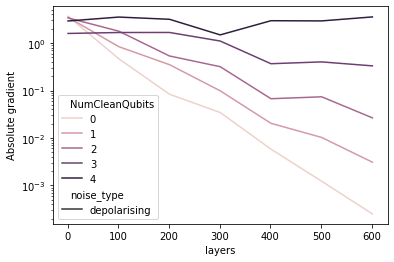

In [15]:
df['Absolute gradient'] = np.abs(df['Grad'])
g = sns.lineplot(data=df, x="layers", y="Absolute gradient", hue=r"NumCleanQubits", style='noise_type', ci=None,estimator=np.mean)
g.set_yscale("log")

In [6]:
df2 = pd.read_pickle('results/S_1-1_L_1-11_Q_4_depolarising_0.002425.pkl')
g = sns.lineplot(data=df2, x="Layers", y="Absolute gradient", hue=r"$n_d$", style='Setup:', ci=None,estimator=np.mean)
g.set_yscale("log")

ValueError: Could not interpret value `Absolute gradient` for parameter `y`